In [382]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

I first put your code here

In [383]:
df2 = pd.read_csv('members_dataset.csv')

In [384]:
df2.head()

,Customer ID,Membership Start Date,Transaction Date,Payment Type,Revenue
0,386379,2019-02-19,2019-02-18,Annual Fee,285.9
1,386379,2019-02-19,2019-02-18,Monthly Fee,26.5
2,386379,2019-02-19,2019-03-19,Monthly Fee,26.5
3,386379,2019-02-19,2019-04-19,Monthly Fee,26.5
4,386379,2019-02-19,2019-05-19,Monthly Fee,26.5


In [385]:
df2['Membership Start Date'] = pd.to_datetime(df2['Membership Start Date'])
df2["Transaction Date"] = pd.to_datetime(df2["Transaction Date"])
df2['Transaction Date Month_Year'] = df2['Transaction Date'].dt.strftime('%Y-%m')

In [386]:
df2['Member_ID'] = "_"+df2["Customer ID"].map(str)+"_"

In [387]:
#Function to gimme a dataframe "structure". Kinda equivalent to R's str()
def rstr(df): 
    print("\n")
    return df.shape,df.apply(lambda x: [x.unique()])
print(rstr(df2))
print(df2.info())
print(df2.dtypes)



((49465, 7),                                          Customer ID  \
0  [386379, 385532, 382351, 375345, 363517, 36230...   

                               Membership Start Date  \
0  [2019-02-19T00:00:00.000000000, 2019-02-15T00:...   

                                    Transaction Date  \
0  [2019-02-18T00:00:00.000000000, 2019-03-19T00:...   

                Payment Type  \
0  [Annual Fee, Monthly Fee]   

                                             Revenue  \
0  [285.9, 26.5, 331.9, 277.1, 2259.9, 269.9, 509...   

                         Transaction Date Month_Year  \
0  [2019-02, 2019-03, 2019-04, 2019-05, 2019-01, ...   

                                           Member_ID  
0  [_386379_, _385532_, _382351_, _375345_, _3635...  )
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49465 entries, 0 to 49464
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   C

In [388]:
df2.groupby(['Transaction Date'])['Revenue'].max().nlargest(1)

Transaction Date
2018-12-18    6410.2
Name: Revenue, dtype: float64

In [389]:
df2.groupby('Transaction Date').max()[['Revenue']].sort_values('Revenue', ascending = False).head(1)

,Revenue
Transaction Date,
2018-12-18,6410.2


In [390]:
print(df2[df2["Transaction Date"] == '2018-12-18']['Payment Type'].value_counts())
print(df2[df2["Transaction Date"] == '2018-12-18']['Payment Type'].value_counts(normalize=True))

Monthly Fee    119
Annual Fee      38
Name: Payment Type, dtype: int64
Monthly Fee    0.757962
Annual Fee     0.242038
Name: Payment Type, dtype: float64


In [391]:
df2.groupby(['Transaction Date Month_Year'])['Revenue'].max().nlargest(1) 
df2.groupby('Transaction Date Month_Year').max()[['Revenue']].sort_values('Revenue', ascending = False).head(1)

,Revenue
Transaction Date Month_Year,
2018-12,6410.2


In [392]:
print(df2[df2["Transaction Date Month_Year"] == '2018-12']['Payment Type'].value_counts())
print(df2[df2["Transaction Date Month_Year"] == '2018-12']['Payment Type'].value_counts(normalize=True))

Monthly Fee    3994
Annual Fee     1576
Name: Payment Type, dtype: int64
Monthly Fee    0.717056
Annual Fee     0.282944
Name: Payment Type, dtype: float64


In [393]:
df2_Pre = df2[df2['Transaction Date Month_Year']<"2018-12"]
df2_Pos = df2[df2['Transaction Date Month_Year']>="2018-12"]

In [394]:
list_diff = set(df2_Pos["Member_ID"]).difference(df2_Pre["Member_ID"])

In [395]:
df3A = df2_Pos[df2_Pos['Member_ID'].isin(list_diff)]

In [396]:
df3A.head()

,Customer ID,Membership Start Date,Transaction Date,Payment Type,Revenue,Transaction Date Month_Year,Member_ID
0,386379,2019-02-19,2019-02-18,Annual Fee,285.9,2019-02,_386379_
1,386379,2019-02-19,2019-02-18,Monthly Fee,26.5,2019-02,_386379_
2,386379,2019-02-19,2019-03-19,Monthly Fee,26.5,2019-03,_386379_
3,386379,2019-02-19,2019-04-19,Monthly Fee,26.5,2019-04,_386379_
4,386379,2019-02-19,2019-05-19,Monthly Fee,26.5,2019-05,_386379_


In [397]:
df3B = pd.DataFrame(pd.merge(df2_Pre, df2_Pos,how='outer', on='Member_ID', indicator=True, suffixes=('_foo','')).query('_merge == "right_only"'))

In [398]:
df3_Pre = df2[df2['Transaction Date Month_Year']<"2018-07"]
df3_Pos = df2[df2['Transaction Date Month_Year']>="2018-07"]

In [399]:
list_diff = set(df3_Pos["Member_ID"]).difference(df3_Pre["Member_ID"])
where_diff = df3_Pos["Member_ID"].isin(list_diff)

In [400]:
where_diff.head()

0    True
1    True
2    True
3    True
4    True
Name: Member_ID, dtype: bool

In [401]:
df4 = df3_Pos[df3_Pos['Member_ID'].isin(list_diff)]

In [402]:
df5 = df4[df4['Transaction Date Month_Year']>"2018-07"]

In [403]:
print(df5.groupby(['Member_ID']).agg({'Transaction Date Month_Year': 'nunique'}).sum())
print(df5.groupby(['Member_ID']).agg({'Transaction Date Month_Year': 'nunique'}).count())
print(df5.groupby(['Member_ID']).agg({'Transaction Date Month_Year': 'nunique'}).sum()/df5.groupby(['Member_ID']).agg({'Transaction Date Month_Year': 'nunique'}).count())

Transaction Date Month_Year    36196
dtype: int64
Transaction Date Month_Year    10850
dtype: int64
Transaction Date Month_Year    3.336037
dtype: float64


In [404]:
print(df5.groupby(['Member_ID']).agg({'Transaction Date Month_Year': 'nunique'}).count())


Transaction Date Month_Year    10850
dtype: int64


In [405]:
print(df5['Member_ID'].nunique())

10850


In [410]:
df2[df2['Transaction Date Month_Year']=="2019-05"].groupby(['Member_ID']).agg({'Member_ID': 'nunique'}).count()

Member_ID    4533
dtype: int64

In [411]:
df5.drop('Member_ID',axis=1,inplace=True)

/Users/fayezabu-ajamieh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# My Code

My rationale is as follows: If a customer continues to make payments until May 2019, then he is a retained customer, otherwise I will assume that that customer has been lost. I begin by preparing the features. My idea is that the longer the customer has been with the company, the more likely he/she will continue to be with the company

In [412]:
# Add two columns per customer, the date of the first transaction and the date of the last transactio
df5['First Transaction'] = df5.groupby('Customer ID')['Transaction Date'].transform('min')
df5['Last Transaction'] = df5.groupby('Customer ID')['Transaction Date'].transform('max')

/Users/fayezabu-ajamieh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fayezabu-ajamieh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [413]:
df5.head()

,Customer ID,Membership Start Date,Transaction Date,Payment Type,Revenue,Transaction Date Month_Year,First Transaction,Last Transaction
0,386379,2019-02-19,2019-02-18,Annual Fee,285.9,2019-02,2019-02-18,2019-05-19
1,386379,2019-02-19,2019-02-18,Monthly Fee,26.5,2019-02,2019-02-18,2019-05-19
2,386379,2019-02-19,2019-03-19,Monthly Fee,26.5,2019-03,2019-02-18,2019-05-19
3,386379,2019-02-19,2019-04-19,Monthly Fee,26.5,2019-04,2019-02-18,2019-05-19
4,386379,2019-02-19,2019-05-19,Monthly Fee,26.5,2019-05,2019-02-18,2019-05-19


In [414]:
# Add a comlumn holding the length of the customer's membership. 
#This is taken as the difference between the dates of the last and first transactions. Taking the date of membership
# gives some negative values for customers who left after one transaction
df5['Membership Length in Days'] = (df5['Last Transaction']-df5['First Transaction']).dt.days.astype(int)

/Users/fayezabu-ajamieh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [415]:
df5.head()

,Customer ID,Membership Start Date,Transaction Date,Payment Type,Revenue,Transaction Date Month_Year,First Transaction,Last Transaction,Membership Length in Days
0,386379,2019-02-19,2019-02-18,Annual Fee,285.9,2019-02,2019-02-18,2019-05-19,90
1,386379,2019-02-19,2019-02-18,Monthly Fee,26.5,2019-02,2019-02-18,2019-05-19,90
2,386379,2019-02-19,2019-03-19,Monthly Fee,26.5,2019-03,2019-02-18,2019-05-19,90
3,386379,2019-02-19,2019-04-19,Monthly Fee,26.5,2019-04,2019-02-18,2019-05-19,90
4,386379,2019-02-19,2019-05-19,Monthly Fee,26.5,2019-05,2019-02-18,2019-05-19,90


In [416]:
# Next, find the total number of transactions per customer
df5['Number of Transactions'] = df5.groupby('Customer ID')['Transaction Date'].transform('count')

/Users/fayezabu-ajamieh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [417]:
# Find the total sum paid per customer
df5['Total Payments'] = df5.groupby('Customer ID')['Revenue'].transform('sum')

/Users/fayezabu-ajamieh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [325]:
# Define a little function to determine if the customer has been retained or not. All customers who 
# haven't made a payment in May 2019 are assumed lost
def retained(timestamp):
    if timestamp.year != 2019:
        return 0
    elif timestamp.month < 5:
        return 0
    else:
        return 1

In [418]:
df5['Retained'] = df5['Last Transaction'].apply(retained)

/Users/fayezabu-ajamieh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [419]:
df5.head()

,Customer ID,Membership Start Date,Transaction Date,Payment Type,Revenue,Transaction Date Month_Year,First Transaction,Last Transaction,Membership Length in Days,Number of Transactions,Total Payments,Retained
0,386379,2019-02-19,2019-02-18,Annual Fee,285.9,2019-02,2019-02-18,2019-05-19,90,5,391.9,1
1,386379,2019-02-19,2019-02-18,Monthly Fee,26.5,2019-02,2019-02-18,2019-05-19,90,5,391.9,1
2,386379,2019-02-19,2019-03-19,Monthly Fee,26.5,2019-03,2019-02-18,2019-05-19,90,5,391.9,1
3,386379,2019-02-19,2019-04-19,Monthly Fee,26.5,2019-04,2019-02-18,2019-05-19,90,5,391.9,1
4,386379,2019-02-19,2019-05-19,Monthly Fee,26.5,2019-05,2019-02-18,2019-05-19,90,5,391.9,1


<AxesSubplot:xlabel='Payment Type'>

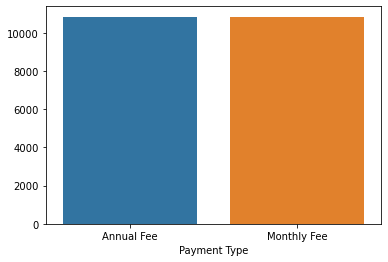

In [420]:
# Here I check whether the type of payment is indicative or not. It seems that there isn't much difference
# between them, meaning that most customers who made an annual payment, also made monthly payments. So the 
# payment type is not an important feature
sns.barplot(x='Payment Type',y=df5['Customer ID'].nunique(),data=df5)

In [421]:
# Keep the important features and the target column
df6 = df5.drop(['Membership Start Date','Transaction Date','Payment Type',
                'Payment Type','Revenue','Transaction Date Month_Year','First Transaction','Last Transaction'],axis=1)

In [424]:
# Remove duplicated customers since I have their information now. I also no longer need the customer ID
df6.drop_duplicates(inplace=True)
df6.drop('Customer ID',axis=1,inplace=True)

In [425]:
df6.head()

,Membership Length in Days,Number of Transactions,Total Payments,Retained
0,90,5,391.9,1
5,90,5,391.9,1
10,90,5,437.9,1
15,60,4,411.4,0
19,147,6,409.6,1


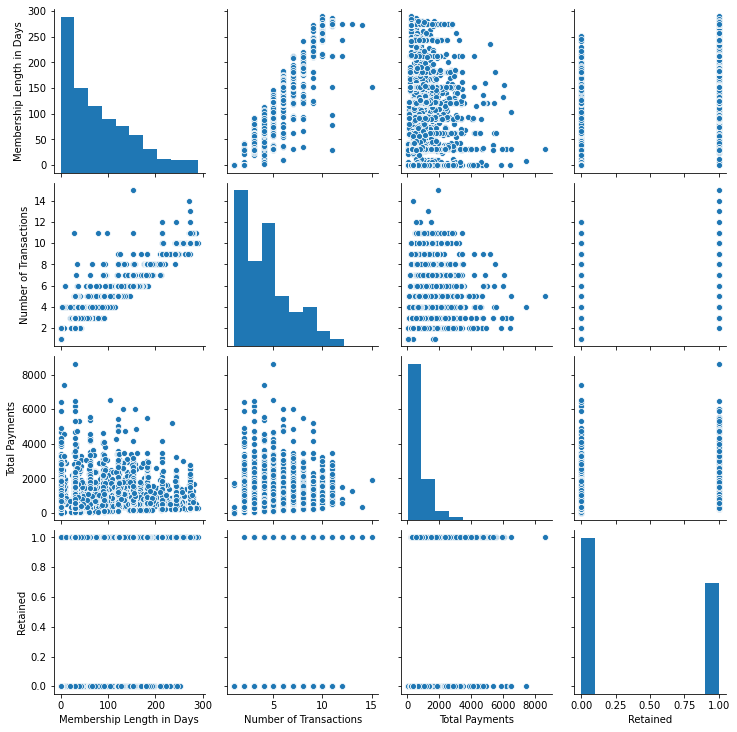

In [426]:
# Data visualization to see correlations
sns.pairplot(df6)

<AxesSubplot:>

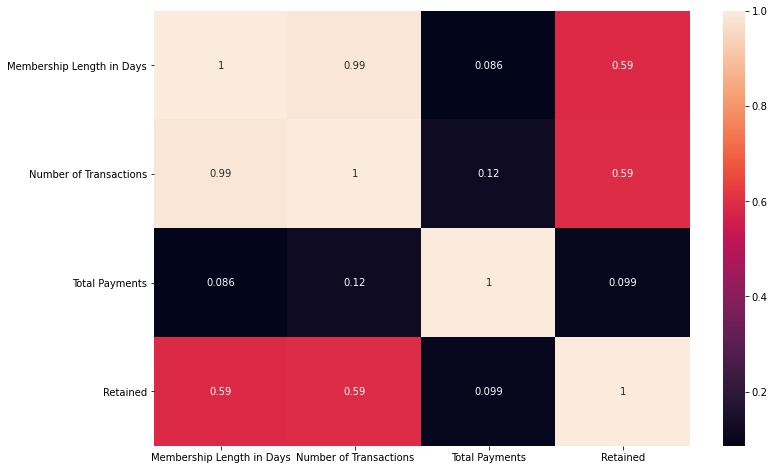

In [431]:
# Check correlations
plt.figure(figsize=(12,8))
sns.heatmap(df6.corr(),annot=True)

In [433]:
# It seems that whether the customer is retained or not does not depend much on how much they paid, so I'll drop it
# Maybe having the total number of transactions and the length of stay is redundant, since both are highly correlated
df7 = df6.drop('Total Payments',axis=1)

In [434]:
# Do train-test split, train the model, make predictions and then evaluate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [346]:
X = df7.drop(['Retained'],axis=1)
y = df7['Retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [435]:
log_reg = LogisticRegression()

In [436]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [437]:
log_pred = log_reg.predict(X_test)

In [438]:
print(confusion_matrix(y_test,log_pred))
print('\n')
print(classification_report(y_test,log_pred))

[[1328  258]
 [ 334  793]]


              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1586
           1       0.75      0.70      0.73      1127

    accuracy                           0.78      2713
   macro avg       0.78      0.77      0.77      2713
weighted avg       0.78      0.78      0.78      2713



In [454]:
# Out of curiousity, I will see what happens when I drop the the membership length in days and only keep
# number of transactions

In [455]:
df7 = df6.drop(['Total Payments','Membership Length in Days'],axis=1)

In [456]:
# Do train-test split, train the model, make predictions and then evaluate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [473]:
X = df7.drop(['Retained'],axis=1)
y = df7['Retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [474]:
log_reg = LogisticRegression()

In [475]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [476]:
log_pred = log_reg.predict(X_test)

In [477]:
print(confusion_matrix(y_test,log_pred))
print('\n')
print(classification_report(y_test,log_pred))

[[1328  258]
 [ 334  793]]


              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1586
           1       0.75      0.70      0.73      1127

    accuracy                           0.78      2713
   macro avg       0.78      0.77      0.77      2713
weighted avg       0.78      0.78      0.78      2713



In [467]:
# The results are identical to the previous case, meaning that the membership duration is redundant, as expected

In [ ]:
# I don't know if I can do better that this. I am afraid I am not familar with survival analysis yet